/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


[[14.   0.   0.  ... 61.  25.   0. ]
 [28.  99.7  8.  ... 13.   0.   0. ]
 [20.  89.  15.  ... 33.   0.   0. ]
 ...
 [ 8.   1.   6.  ... 36.   0.   0. ]
 [ 4.   0.   0.  ... 73.  34.   0. ]
 [23.  14.  43.  ... 72.   0.  34. ]]


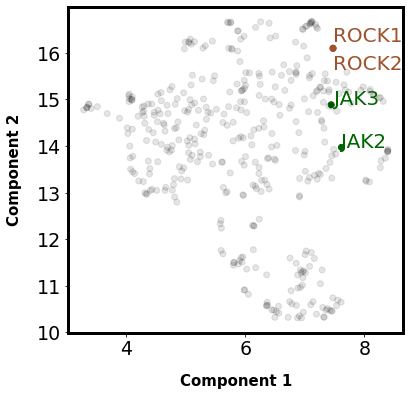

In [6]:
# REQUIRES UMAP INSTALLATION https://umap-learn.readthedocs.io/

#Copied from Sukrit's implementation using the PKIS2 affinity data

import umap
from seaborn import color_palette
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# define basic plotting parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 25

# Read in PKIS2 to get the chemotype data for the inhibitors
full_df = pd.read_excel("./PKIS2_dataset.xlsx", nrows=645)

PKIS2_df = full_df.iloc[:, 7:]
#print(PKIS2_data)
kinase_names = PKIS2_df.columns
PKIS2 = PKIS2_df.to_numpy()
PKIS2 = np.transpose(PKIS2)
#print(PKIS2)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler_fit = scaler.fit(PKIS2)
scaled_features = scaler_fit.transform(PKIS2)

print(PKIS2)

# like inhibitor_PCA.py - create and plot the embedding 
inhib_umap = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=15, min_dist=0.00001, random_state=1337).fit(PKIS2)
embedding = inhib_umap.transform(PKIS2)

# Plot the embedding
pDf = pd.DataFrame(data = embedding, columns = ['Component 1','Component 2'])

#print(pDf)

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)

#ax.scatter(pDf['Component 1'], pDf['Component 2'])

colors = []
alphas = []

for kinase, x, y in zip(kinase_names, pDf['Component 1'], pDf['Component 2']):
    if(kinase == 'JAK2(JH1domain-catalytic)'):
        plt.annotate('JAK2', xy=(x, y), xytext=(0, 0), color='darkgreen', textcoords='offset points')
        colors.append('darkgreen')
        alphas.append(1)
    elif(kinase == 'JAK3(JH1domain-catalytic)'):
        plt.annotate('JAK3', xy=(x+0.05, y), xytext=(0, 0), color='darkgreen', textcoords='offset points')
        colors.append('darkgreen')
        alphas.append(1)
    elif(kinase == 'ROCK1'):
        plt.annotate('ROCK1', xy=(x, y+0.15), xytext=(0, 0), color='sienna', textcoords='offset points')
        colors.append('sienna')
        alphas.append(1)
    elif(kinase == 'ROCK2'):
        plt.annotate('ROCK2', xy=(x, y-0.45), xytext=(0, 0), color='sienna', textcoords='offset points')
        colors.append('sienna')
        alphas.append(1)
    else:
        colors.append('black')
        alphas.append(0.1)
        
ax.scatter(pDf['Component 1'], pDf['Component 2'], color=colors, alpha=alphas)

plt.show()

#fig.savefig("UMAP_YES-FES_ROCK1-2.tiff", bbox_inches='tight',dpi=300)





